### IMPORT, DATA

In [19]:
import pandas as pd
import numpy as np
import os
import glob
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['font.size'] = 15

In [3]:
train = pd.read_csv('./data/train/train.csv')
train.tail()

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
52555,1094,21,30,0,0,2.4,70.70,-4,0.0
52556,1094,22,0,0,0,2.4,66.79,-4,0.0
52557,1094,22,30,0,0,2.2,66.78,-4,0.0
52558,1094,23,0,0,0,2.1,67.72,-4,0.0
52559,1094,23,30,0,0,2.1,67.70,-4,0.0


In [4]:
submission = pd.read_csv('./data/sample_submission.csv')
submission.tail()

,id,q_0.1,q_0.2,q_0.3,q_0.4,q_0.5,q_0.6,q_0.7,q_0.8,q_0.9
7771,80.csv_Day8_21h30m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7772,80.csv_Day8_22h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7773,80.csv_Day8_22h30m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7774,80.csv_Day8_23h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7775,80.csv_Day8_23h30m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### CORRELATION

<AxesSubplot:>

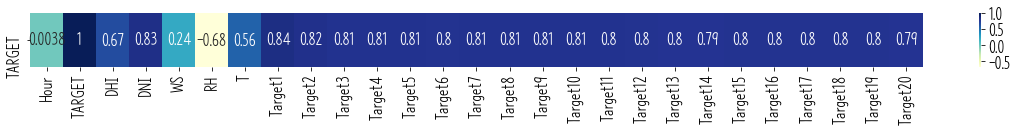

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (20, 1)

corr = df_train.corr(method = 'pearson')
corr = corr.iloc[1:2,:]
sns.heatmap(corr, annot=True, cmap="YlGnBu")

#sns.pairplot(df_train, diag_kind="kde")
#plt.show()
#sns.pairplot(df_weather, hue="species", markers=["o", "s", "D"], palette="husl")
#plt.show()

In [34]:
col_name_list     = ['Hour', 'TARGET', 'DHI', 'DNI', 'WS', 'RH', 'T'] #train.columns.values.iloc
iteration_count   = 20

In [35]:
def shift_data(data, iteration_feature, is_train=True):
    temp = data.copy()
    temp = temp[col_name_list]

    if is_train==True:       
        for i in range(1, iteration_count+1): 
            temp[iteration_feature+str(i)] = temp[iteration_feature].shift(-48*i).fillna(method='ffill')
        temp = temp.dropna()
        return temp.iloc[:-48*iteration_count]

    elif is_train==False:
        temp = temp[col_name_list]
        return temp.iloc[-48:, :]

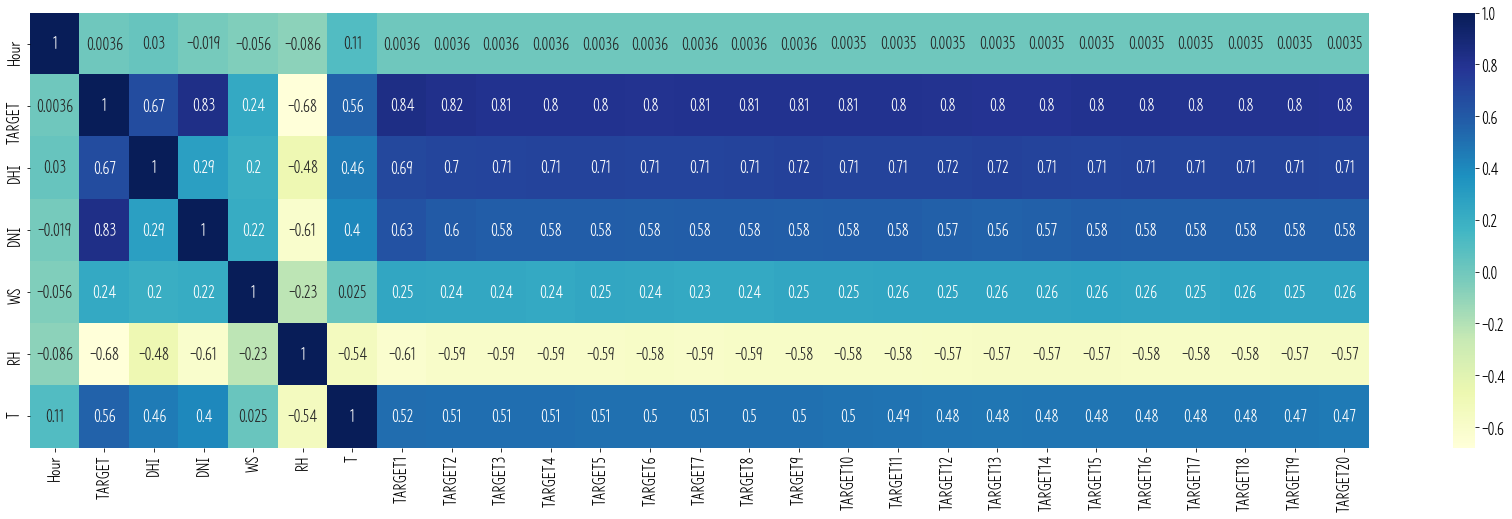

In [36]:
# corr1 _shifted target value
df_train  = shift_data(train, 'TARGET')
scaler    = MinMaxScaler(feature_range=(0, 1))
scaled_df = pd.DataFrame(scaler.fit_transform(df_train), columns=df_train.columns)
corr      = scaled_df.corr(method = 'pearson').iloc[:-iteration_count,:]

plt.rcParams['figure.figsize'] = (30, 8)
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.show()

TARGET


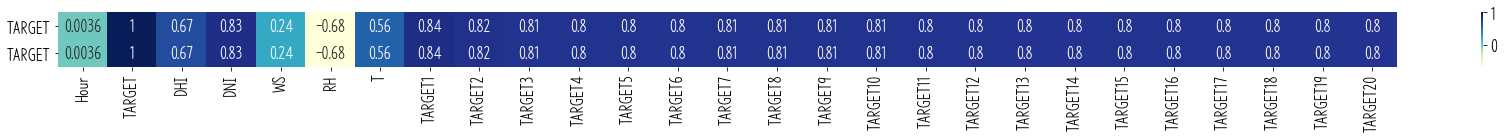

DHI


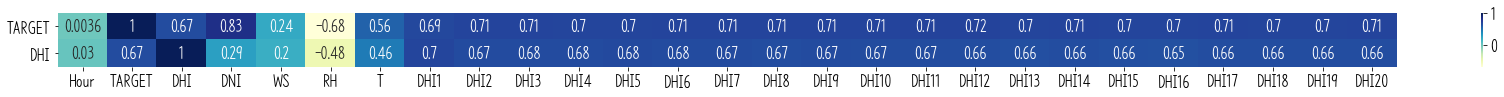

DNI


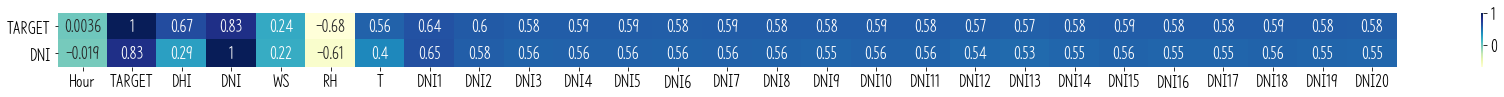

WS


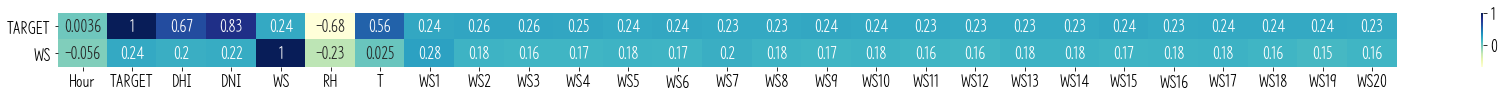

RH


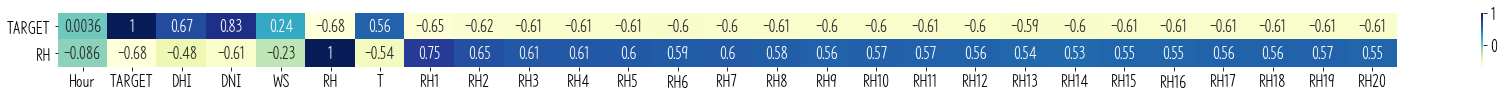

T


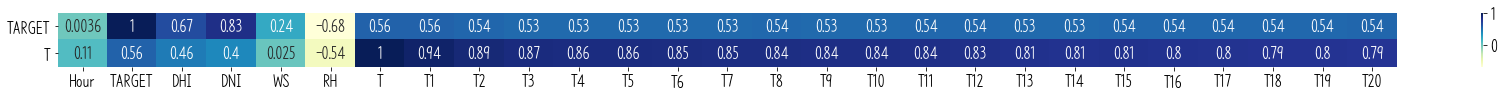

In [33]:
# corr2 _shifted feature value
feature_idx = 1
plt.rcParams['figure.figsize'] = (iteration_count*1.5, 1)

for col_name in col_name_list:
    if col_name=='Hour':
        continue;
    df_train  = shift_data(train, col_name)
    scaled_df = pd.DataFrame(scaler.fit_transform(df_train), columns=df_train.columns)
    corr      = scaled_df.corr(method = 'pearson').iloc[[1,feature_idx],:]
    
    sns.heatmap(corr, annot=True, cmap="YlGnBu")
    plt.show()
    feature_idx += 1

### DATA SHIFT (TARGET)

In [12]:
def preprocess_data(data, is_train=True):
    temp = data.copy()
    temp = temp[['Hour', 'TARGET', 'DHI', 'DNI', 'WS', 'RH', 'T']]

    if is_train==True:          
        temp['Target1'] = temp['TARGET'].shift(-48).fillna(method='ffill')
        temp['Target2'] = temp['TARGET'].shift(-48*2).fillna(method='ffill')
        temp = temp.dropna()
        return temp.iloc[:-96]

    elif is_train==False:
        temp = temp[['Hour', 'TARGET', 'DHI', 'DNI', 'WS', 'RH', 'T']]
        return temp.iloc[-48:, :]

df_train = preprocess_data(train)
df_train.iloc[:48]

,Hour,TARGET,DHI,DNI,WS,RH,T,Target1,Target2
0,0,0.000000,0,0,1.5,69.08,-12,0.000000,0.000000
1,0,0.000000,0,0,1.5,69.06,-12,0.000000,0.000000
2,1,0.000000,0,0,1.6,71.78,-12,0.000000,0.000000
3,1,0.000000,0,0,1.6,71.75,-12,0.000000,0.000000
4,2,0.000000,0,0,1.6,75.20,-12,0.000000,0.000000
5,2,0.000000,0,0,1.5,69.29,-11,0.000000,0.000000
6,3,0.000000,0,0,1.5,72.56,-11,0.000000,0.000000
7,3,0.000000,0,0,1.4,72.55,-11,0.000000,0.000000
8,4,0.000000,0,0,1.3,74.62,-11,0.000000,0.000000
9,4,0.000000,0,0,1.3,74.61,-11,0.000000,0.000000


In [91]:
df_train.iloc[-48*loof_n:-48*(loof_n-1),:]

,Hour,TARGET,DHI,DNI,WS,RH,T,Target1,Target2
52368,0,0.000000,0,0,2.6,52.59,-1,0.000000,0.000000
52369,0,0.000000,0,0,2.5,52.60,0,0.000000,0.000000
52370,1,0.000000,0,0,2.5,52.19,0,0.000000,0.000000
52371,1,0.000000,0,0,2.4,52.19,0,0.000000,0.000000
52372,2,0.000000,0,0,2.3,51.74,0,0.000000,0.000000
52373,2,0.000000,0,0,2.2,51.73,0,0.000000,0.000000
52374,3,0.000000,0,0,2.1,51.08,0,0.000000,0.000000
52375,3,0.000000,0,0,2.0,51.08,0,0.000000,0.000000
52376,4,0.000000,0,0,1.9,50.22,-1,0.000000,0.000000
52377,4,0.000000,0,0,1.8,50.22,-1,0.000000,0.000000


In [7]:
train.iloc[48:96]

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
48,1,0,0,0,0,1.6,90.66,-10,0.000000
49,1,0,30,0,0,1.6,90.68,-10,0.000000
50,1,1,0,0,0,1.6,88.11,-11,0.000000
51,1,1,30,0,0,1.6,88.11,-11,0.000000
52,1,2,0,0,0,1.6,90.85,-11,0.000000
53,1,2,30,0,0,1.6,90.84,-11,0.000000
54,1,3,0,0,0,1.7,93.78,-12,0.000000
55,1,3,30,0,0,1.7,93.77,-12,0.000000
56,1,4,0,0,0,1.7,90.46,-12,0.000000
57,1,4,30,0,0,1.6,90.46,-12,0.000000


In [8]:
train.iloc[48+48:96+48]

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
96,2,0,0,0,0,2.2,73.80,-8,0.000000
97,2,0,30,0,0,2.1,68.20,-8,0.000000
98,2,1,0,0,0,2.1,69.06,-8,0.000000
99,2,1,30,0,0,2.1,69.04,-8,0.000000
100,2,2,0,0,0,2.2,69.38,-8,0.000000
101,2,2,30,0,0,2.2,69.36,-7,0.000000
102,2,3,0,0,0,2.2,70.03,-7,0.000000
103,2,3,30,0,0,2.2,70.02,-7,0.000000
104,2,4,0,0,0,2.3,72.18,-7,0.000000
105,2,4,30,0,0,2.4,66.78,-7,0.000000


In [ ]:
df_train.tail()

In [9]:
df_test = []

for i in range(81):
    file_path = './data/test/' + str(i) + '.csv'
    temp = pd.read_csv(file_path)
    temp = preprocess_data(temp, is_train=False)
    df_test.append(temp)

X_test = pd.concat(df_test)
X_test.shape

(3888, 7)

In [10]:
X_test.head(48)

,Hour,TARGET,DHI,DNI,WS,RH,T
288,0,0.000000,0,0,0.8,80.92,-2.8
289,0,0.000000,0,0,0.9,81.53,-2.9
290,1,0.000000,0,0,1.0,79.91,-3.0
291,1,0.000000,0,0,0.9,79.91,-3.0
292,2,0.000000,0,0,0.9,77.20,-3.0
293,2,0.000000,0,0,1.1,78.36,-3.2
294,3,0.000000,0,0,1.2,76.78,-3.4
295,3,0.000000,0,0,1.8,77.93,-3.6
296,4,0.000000,0,0,2.4,76.89,-3.8
297,4,0.000000,0,0,2.9,78.64,-4.1


In [11]:
df_train.head()

,Hour,TARGET,DHI,DNI,WS,RH,T,Target1,Target2
0,0,0.0,0,0,1.5,69.08,-12,0.0,0.0
1,0,0.0,0,0,1.5,69.06,-12,0.0,0.0
2,1,0.0,0,0,1.6,71.78,-12,0.0,0.0
3,1,0.0,0,0,1.6,71.75,-12,0.0,0.0
4,2,0.0,0,0,1.6,75.20,-12,0.0,0.0


In [12]:
df_train.iloc[-48:]

,Hour,TARGET,DHI,DNI,WS,RH,T,Target1,Target2
52416,0,0.000000,0,0,3.4,50.47,-1,0.000000,0.000000
52417,0,0.000000,0,0,3.4,50.45,0,0.000000,0.000000
52418,1,0.000000,0,0,3.5,50.30,0,0.000000,0.000000
52419,1,0.000000,0,0,3.5,50.30,0,0.000000,0.000000
52420,2,0.000000,0,0,3.5,51.14,0,0.000000,0.000000
52421,2,0.000000,0,0,3.5,51.12,0,0.000000,0.000000
52422,3,0.000000,0,0,3.6,52.09,0,0.000000,0.000000
52423,3,0.000000,0,0,3.7,48.39,0,0.000000,0.000000
52424,4,0.000000,0,0,3.8,49.00,0,0.000000,0.000000
52425,4,0.000000,0,0,3.9,49.00,0,0.000000,0.000000


In [ ]:
from sklearn.model_selection import train_test_split
X_train_1, X_valid_1, Y_train_1, Y_valid_1 = train_test_split(df_train.iloc[:, :-2], df_train.iloc[:, -2], test_size=0.3, random_state=0)
X_train_2, X_valid_2, Y_train_2, Y_valid_2 = train_test_split(df_train.iloc[:, :-2], df_train.iloc[:, -1], test_size=0.3, random_state=0)

In [ ]:
X_train_1.head()
X_test.head()

In [ ]:
quantiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]


In [ ]:
from lightgbm import LGBMRegressor

# Get the model and the predictions in (a) - (b)
def LGBM(q, X_train, Y_train, X_valid, Y_valid, X_test):
    
    # (a) Modeling  
    model = LGBMRegressor(objective='quantile', alpha=q,
                         n_estimators=10000, bagging_fraction=0.7, learning_rate=0.027, subsample=0.7)                   
                         
                         
    model.fit(X_train, Y_train, eval_metric = ['quantile'], 
          eval_set=[(X_valid, Y_valid)], early_stopping_rounds=300, verbose=500)

    # (b) Predictions
    pred = pd.Series(model.predict(X_test).round(2))
    return pred, model

# TARGET 예측

In [ ]:
# Target 예측

def train_data(X_train, Y_train, X_valid, Y_valid, X_test):

    LGBM_models=[]
    LGBM_actual_pred = pd.DataFrame()

    for q in quantiles:
        print(q)
        pred , model = LGBM(q, X_train, Y_train, X_valid, Y_valid, X_test)
        LGBM_models.append(model)
        LGBM_actual_pred = pd.concat([LGBM_actual_pred,pred],axis=1)

    LGBM_actual_pred.columns=quantiles
    
    return LGBM_models, LGBM_actual_pred

In [ ]:
# Target1
models_1, results_1 = train_data(X_train_1, Y_train_1, X_valid_1, Y_valid_1, X_test)
results_1.sort_index()[:48]

In [ ]:
# Target2
models_2, results_2 = train_data(X_train_2, Y_train_2, X_valid_2, Y_valid_2, X_test)
results_2.sort_index()[:48]

In [ ]:
results_1.sort_index().iloc[:48]

In [ ]:
results_2.sort_index()

In [ ]:
print(results_1.shape, results_2.shape)

In [ ]:
submission.loc[submission.id.str.contains("Day7"), "q_0.1":] = results_1.sort_index().values
submission.loc[submission.id.str.contains("Day8"), "q_0.1":] = results_2.sort_index().values
submission

In [ ]:
submission.iloc[:48]

In [ ]:
submission.iloc[48:96]
submission.to_csv('./data/submission_v3.csv', index=False)